# Background


This notebook is to make a baseline for slot1, aspect category detection. We use glove to generate sentence vector. 

Because we want to augment the embedding wegiht of target word to evaluate whether or not the attention is useful. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pathlib import Path
import anago
from anago.utils import load_data_and_labels, load_glove

Using TensorFlow backend.


In [2]:
ls ../datasets/

raw-semeval-2016/ restaurant2.zip   semeval-2016/
restaurant/       restaurant_small/


In [3]:
train_path = Path.cwd().parent.joinpath('datasets/semeval-2016/train.csv')
test_path = Path.cwd().parent.joinpath('datasets/semeval-2016/test.csv')

In [4]:
# Read data
data_train = pd.read_csv(train_path)
data_test = pd.read_csv(test_path)

In [5]:
def df2data(df):
    """Read data and labels from dataframe
    Input:
        df: three columns, ['Sentence #', 'Tag', 'Word']
    Output:
        data: datasize * ['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.']
        label: datasize * ['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']
    """
    agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),
                                                 s["Tag"].values.tolist())]
    grouped = df.groupby("Sentence #").apply(agg_func)
    data = [[w[0] for w in s] for s in grouped]
    label = [[w[1] for w in s] for s in grouped]  
    
    return data, label

In [6]:
!ls ../datasets/semeval-2016/slot1/train_target.npy

../datasets/semeval-2016/slot1/train_target.npy


In [7]:
# load target words from npy
train_target_path = '../datasets/semeval-2016/slot1/train_target.npy'
test_target_path = '../datasets/semeval-2016/slot1/test_target.npy'

train_target = list(np.load(train_target_path))
test_target = list(np.load(test_target_path))

In [8]:
train_target[:30]

[['place'],
 ['staff'],
 ['NULL'],
 ['food', 'portions'],
 ['NULL'],
 ['place'],
 ['food'],
 ['Saul'],
 ['foie gras terrine with figs', 'duck confit'],
 ['wine list'],
 ['NULL'],
 ['restaurant'],
 ['cart attendant'],
 ['NULL'],
 ['Food'],
 ['Chow fun', 'pork shu mai', 'NULL'],
 ['place'],
 ['Fish'],
 ['Service', 'oysters', 'NULL'],
 ['NULL'],
 ['Restaurant Saul'],
 ['NULL', 'service', 'decor'],
 ['duck breast special'],
 ['NULL'],
 [],
 ['NULL'],
 ['food', 'Thai fusion stuff', 'NULL'],
 ['Grilled Chicken special with Edamame Puree'],
 ['Edamame pureed'],
 []]

In [9]:
x_train_words, _ = df2data(data_train)
x_test_words, _ = df2data(data_test)

### embedding

In [10]:
EMBEDDING_PATH = '../embedding_weights/glove.840B.300d.txt'

In [11]:
embeddings = load_glove(EMBEDDING_PATH)

below are some test code

In [29]:
embeddings['nice'].shape

(300,)

In [12]:
train_target[:30]

[['place'],
 ['staff'],
 ['NULL'],
 ['food', 'portions'],
 ['NULL'],
 ['place'],
 ['food'],
 ['Saul'],
 ['foie gras terrine with figs', 'duck confit'],
 ['wine list'],
 ['NULL'],
 ['restaurant'],
 ['cart attendant'],
 ['NULL'],
 ['Food'],
 ['Chow fun', 'pork shu mai', 'NULL'],
 ['place'],
 ['Fish'],
 ['Service', 'oysters', 'NULL'],
 ['NULL'],
 ['Restaurant Saul'],
 ['NULL', 'service', 'decor'],
 ['duck breast special'],
 ['NULL'],
 [],
 ['NULL'],
 ['food', 'Thai fusion stuff', 'NULL'],
 ['Grilled Chicken special with Edamame Puree'],
 ['Edamame pureed'],
 []]

In [14]:
targets_string = [' '.join(x) for x in train_target]

In [15]:
targets_string

['place',
 'staff',
 'NULL',
 'food portions',
 'NULL',
 'place',
 'food',
 'Saul',
 'foie gras terrine with figs duck confit',
 'wine list',
 'NULL',
 'restaurant',
 'cart attendant',
 'NULL',
 'Food',
 'Chow fun pork shu mai NULL',
 'place',
 'Fish',
 'Service oysters NULL',
 'NULL',
 'Restaurant Saul',
 'NULL service decor',
 'duck breast special',
 'NULL',
 '',
 'NULL',
 'food Thai fusion stuff NULL',
 'Grilled Chicken special with Edamame Puree',
 'Edamame pureed',
 '',
 'place decor vent',
 '',
 '',
 'sake list NULL',
 'spicy tuna roll rock shrimp tempura',
 'service',
 'pink pony',
 'spot',
 'Food',
 'Service',
 'Ambiance',
 'place',
 '',
 '',
 'food',
 'service',
 'waiter',
 'NULL',
 'NULL',
 'NULL',
 'place',
 'NULL',
 'Food',
 'Service',
 'NULL',
 'sea urchin',
 'NULL',
 'sushi',
 'rice to fish ration',
 'half price sushi deal',
 '',
 '',
 'NULL',
 'crowd',
 'food service',
 'NULL',
 '',
 'NULL',
 '',
 'Prix Fixe menu',
 'NULL',
 '',
 'NULL',
 'food',
 'dishes',
 '',
 'NULL',

In [18]:
target_list = [x.split() for x in targets_string]
target_list[:5]

[['place'], ['staff'], ['NULL'], ['food', 'portions'], ['NULL']]

In [22]:
one_sentence = [0]*300
for sent_target in target_list[25:30]: # each sentence 
    print(sent_target)
    if len(sent_target) == 0 or (len(sent_target)==1 and sent_target[0]=='NULL'):
        for word in sent:
            if not embeddings.get(word) is None:
                one_sentence += embeddings[word]
        sentence_vectors.append(one_sentence)
    else:
        for target_word in sent_target:
            one_sentence += embedding[target_word]
        sentence_vectors.append(one_sentence)

['NULL']
['food', 'Thai', 'fusion', 'stuff', 'NULL']
['Grilled', 'Chicken', 'special', 'with', 'Edamame', 'Puree']
['Edamame', 'pureed']
[]


In [24]:
for (sent, sent_target) in zip(x_train_words, targets_string): # each sentence 
    print(sent_target)

place
staff
NULL
food portions
NULL
place
food
Saul
foie gras terrine with figs duck confit
wine list
NULL
restaurant
cart attendant
NULL
Food
Chow fun pork shu mai NULL
place
Fish
Service oysters NULL
NULL
Restaurant Saul
NULL service decor
duck breast special
NULL

NULL
food Thai fusion stuff NULL
Grilled Chicken special with Edamame Puree
Edamame pureed

place decor vent


sake list NULL
spicy tuna roll rock shrimp tempura
service
pink pony
spot
Food
Service
Ambiance
place


food
service
waiter
NULL
NULL
NULL
place
NULL
Food
Service
NULL
sea urchin
NULL
sushi
rice to fish ration
half price sushi deal


NULL
crowd
food service
NULL

NULL

Prix Fixe menu
NULL

NULL
food
dishes

NULL
food NULL
somosas chai chole dhosas dhal
service
kitchen
food
ambience NULL

view
service food
lava cake dessert
Cosette
restaurant
food French Onion soup desserts
ambience food

NULL
pizza cheese
NULL

NULL
pizza
ingredients pizza crust
NULL
meals
seafood wine list menu
ingredients
NULL

Pastrami portion



meal
dumplings
BBQ Salmon Sea Bass Crispy Duck

Al Di La
place
food
NULL
pastas risottos sepia braised rabbit
NULL
food
NULL fish and chips

Dog
dog establishment
NULL
NULL
Cypriot restaurant
pork souvlaki

NULL
Pizza
restaurant
eggplant pizza pastas
half/half pizza
NULL
NULL
food interior
space
meal
sake
Sushi

sashimi rolls
service
Delivery
Delivery guy

Sushi
sushi
NULL
sashimi millennium roll
NULL
NULL
NULL
place
food NULL
NULL

NULL
waiter food views of the city
NULL
place
atmosphere
Place
food seafood spaghetti
NULL
food
NULL
wait staff
space indo-chinese food
NULL
NULL
place
chicken pasta
NULL
place
lobster
restaraunt
NULL
pizza
staff NULL
NULL
place
NULL
service
NULL
restaurant
vitello alla marsala
veal mushrooms
potato balls
NULL
NULL
PLACE
bartender service food waitresses
place
NULL
food
japanese food service
NULL
Chicken teriyaki
food
waitress
dessert

The Four Seasons
food service The Four Seasons
dinner
Red Dragon Roll
Yamato Red Dragon Roll
NULL
Seafood Dynamite
NULL
Su

In [83]:
'fusion' in targets_string[1]

True

Sum all to `word2vector_wegihted` function, augment the weight if the word is target word

In [39]:
def word2vector_wegihted(x_words, targets, times):
    sentence_vectors = []
    targets_string = [' '.join(x) for x in targets]
    for (sent, sent_target) in zip(x_words, targets_string): # each sentence 
        one_sentence = [0]*300
        # If sentence has no target or target is NULL, add word embedding normally 
        if len(sent_target) == 0 or (len(sent_target)==4 and sent_target=='NULL'): # No target or target is NULL
            for word in sent:
                if not embeddings.get(word) is None:
                    one_sentence += embeddings[word]
            sentence_vectors.append(one_sentence)
        # If sentence has multiple target words, augment the target weights
        else:
            for word in sent:
                if not embeddings.get(word) is None and word in sent_target: # if word exist and is the target word
                    one_sentence += times * embeddings[word] # augment 
                elif not embeddings.get(word) is None: # if word exist and is not the target word
                    one_sentence += embeddings[word]
                else: # if the word not exist 
                    pass 
            sentence_vectors.append(one_sentence) 
    
    return np.array(sentence_vectors)


def word2vector(x_words):  # convert words to sentence embedding 
    sentence_vectors = []
    for sent in x_words:
        one_sentence = [0]*300
        for word in sent:
            if not embeddings.get(word) is None:
                one_sentence += embeddings[word]
        sentence_vectors.append(one_sentence)
    return np.array(sentence_vectors)

In [42]:
def target2vector(x_words, targets):
    sentence_vectors = []
    targets_string = [' '.join(x) for x in targets]
    targets_string = [x.split() for x in targets_string]
    for (sent, sent_target) in zip(x_words, targets_string): # each sentence 
        one_sentence = [0]*300
        # If sentence has no target or target is NULL, add word embedding normally 
        if len(sent_target) == 0 or (len(sent_target)==1 and sent_target[0]=='NULL'):
            for word in sent:
                if not embeddings.get(word) is None:
                    one_sentence += embeddings[word]
            sentence_vectors.append(one_sentence)
        # If sentence has multiple target words, only use the target_word embedding as the sentence vector
        else:
            for target_word in sent_target:
                if not embeddings.get(target_word) is None:
                    one_sentence += embeddings[target_word]
            sentence_vectors.append(one_sentence)
    return np.array(sentence_vectors)

In [43]:
x_train = target2vector(x_train_words, train_target)
x_test = target2vector(x_test_words, test_target)

In [44]:
print(x_train.shape)
print(x_test.shape)

(2000, 300)
(676, 300)


1.5 means multiply the weights of word if the word is a target word. We use this to as the attention compeletely extracted

### label 

this is a multicalss classification

In [45]:
train_path = Path.cwd().parent.joinpath('datasets/semeval-2016/slot1/train_label_df.csv')
test_path = Path.cwd().parent.joinpath('datasets/semeval-2016/slot1/test_label_df.csv')

In [46]:
y_train_df = pd.read_csv(train_path)
y_test_df = pd.read_csv(test_path)

In [47]:
y_train_df.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [48]:
y_train = y_train_df.values
y_test = y_test_df.values

# model construct

In [49]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

ovr = OneVsRestClassifier(LogisticRegression())

(2000, 300)
(2000, 12)
[learning_curve] Training set sizes: [ 160  520  880 1240 1600]
[CV]  ................................................................
[CV] .................................... , score=0.415, total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................... , score=0.4825, total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ................................... , score=0.4425, total=   1.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s


[CV] .................................... , score=0.445, total=   1.6s
[CV]  ................................................................
[CV] ................................... , score=0.4525, total=   2.1s
[CV]  ................................................................
[CV] ................................... , score=0.4025, total=   0.1s
[CV]  ................................................................
[CV] ................................... , score=0.4275, total=   0.4s
[CV]  ................................................................
[CV] ..................................... , score=0.41, total=   0.8s
[CV]  ................................................................
[CV] .................................... , score=0.425, total=   1.6s
[CV]  ................................................................
[CV] .................................... , score=0.445, total=   2.4s
[CV]  ................................................................
[CV] .

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))


[CV] .................................... , score=0.425, total=   0.4s
[CV]  ................................................................
[CV] ................................... , score=0.4375, total=   1.0s
[CV]  ................................................................
[CV] ................................... , score=0.4275, total=   1.4s
[CV]  ................................................................
[CV] .................................... , score=0.455, total=   2.1s
[CV]  ................................................................
[CV] ..................................... , score=0.39, total=   0.1s
[CV]  ................................................................
[CV] ................................... , score=0.4075, total=   0.4s
[CV]  ................................................................
[CV] ................................... , score=0.4125, total=   0.8s
[CV]  ................................................................
[CV] .

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 7 is present in all training examples.
  str(classes[c]))


[CV] ................................... , score=0.3775, total=   0.4s
[CV]  ................................................................
[CV] .................................... , score=0.405, total=   0.9s
[CV]  ................................................................
[CV] ................................... , score=0.3875, total=   1.5s
[CV]  ................................................................
[CV] .................................... , score=0.405, total=   2.1s


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   25.6s finished


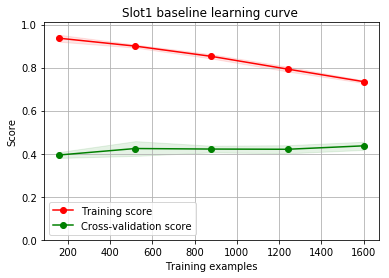

In [51]:
# first to see the cv result 
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


%matplotlib inline

# learning curve function
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(
        estimator, title, X, y, ylim=None, cv=None,
        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), verbose=0):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
ovr = OneVsRestClassifier(LogisticRegression())

X = x_train
train_labels = y_train
print(X.shape)
print(train_labels.shape)
plot_learning_curve(ovr, "Slot1 baseline learning curve ",
                    X, train_labels, ylim=(0.0, 1.01), cv=cv, n_jobs=1, verbose=4)

plt.show()

In [52]:
from sklearn.utils import shuffle
from sklearn.metrics import f1_score

def loop_predict(model, x_train, x_test, y_train, y_test, loop=5):
    f1 = []
    for i in range(loop):
        x_train, x_test = shuffle(x_train, x_test)
        model.fit(x_train, x_test)
        y_pred = model.predict(y_train)
        micro_f1 = f1_score(y_test, y_pred, average='micro')
        f1.append(micro_f1)
    print("F1 is {} (+/-{})".format(np.mean(f1), np.std(f1)))
    return model

In [53]:
train_x = x_train
train_labels = y_train
test_x = x_test
test_labels = y_test

In [54]:
ovr = OneVsRestClassifier(LogisticRegression())

model1 = loop_predict(ovr, train_x, train_labels, test_x, test_labels)

F1 is 0.5809695723166175 (+/-0.0004732094806459398)


- glove with 1.5 times word weighted: 0.5837
- glove with 2 times word weighted: 0.5854
- glove with 3 times word weighted: 0.169
- directly use the target word as embedding: 0.5809